<a href="https://colab.research.google.com/github/arssite/Datalysis/blob/main/Mnist_multiclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Class Classification

This Colab explores multi-class classification problems through the classic MNIST dataset.

## The Dataset
  
This MNIST dataset contains a lot of examples:

* The MNIST training set contains 60,000 examples.
* The MNIST test set contains 10,000 examples.

Each example contains a pixel map showing how a person wrote a digit. For example, the following images shows how a person wrote the digit `1` and how that digit might be represented in a 14x14 pixel map (after the input data is normalized).

![Two images. The first image shows a somewhat fuzzy digit one. The second image shows a 14x14 floating-point array in which most of the cells contain 0 but a few cells contain values between 0.0 and 1.0. The pattern of nonzero values corresponds to the image of the fuzzy digit in the first image.](https://www.tensorflow.org/images/MNIST-Matrix.png)

Each example in the MNIST dataset consists of:

* A label specified by a [rater](https://developers.google.com/machine-learning/glossary/#rater).  Each label must be an integer from 0 to 9.  For example, in the preceding image, the rater would almost certainly assign the label `1` to the example.
* A 28x28 pixel map, where each pixel is an integer between 0 and 255. The pixel values are on a gray scale in which 0 represents white, 255 represents black, and values between 0 and 255 represent various shades of gray.  

This is a multi-class classification problem with 10 output classes, one for each digit.

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [3]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [5]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

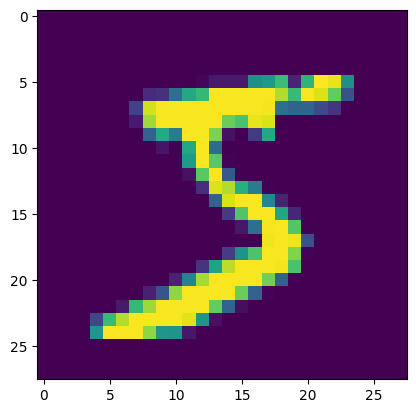

In [8]:
import matplotlib.pyplot as plt
#plt.imshow(x_train[1])
#plt.imshow(x_train[0])
plt.imshow(x_train[2])

# Normalizing

In [9]:
x_train=x_train/255
x_test=x_test/255

In [11]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    